# 0.) Import and Clean data

In [28]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [31]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W8/bank-additional-full.csv", sep = ";")

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [34]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

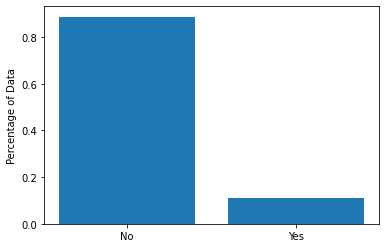

In [36]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [37]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

(51160, 82)


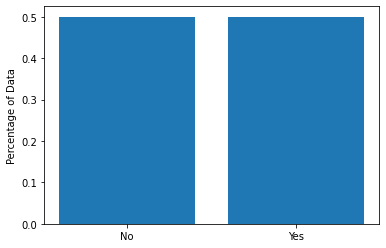

In [44]:
# Oversample on "YES"
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=0)
smote_X, smote_y = ros.fit_resample(X_train, y_train)
print(smote_X.shape)   

obs = len(smote_y)
plt.bar(["No","Yes"],[len(smote_y[smote_y.yes==0])/obs,len(smote_y[smote_y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [45]:
###############
###TRANSFORM###
###############

X_scaled = scaler.transform(smote_X)
y_train = smote_y

In [49]:
print('Mean', X_scaled.mean())
print('STD', X_scaled.std())

Mean -0.0620229174192769
STD 0.8085282605329269


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [50]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.032\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.283\ngini = 0.375\nsamples = 24040\nvalue = [18034, 6006]\nclass = No'),
 Text(0.125, 0.375, 'duration <= -0.478\ngini = 0.452\nsamples = 16964\nvalue = [11100, 5864]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.278\nsamples = 7650\nvalue = [6376, 1274]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 9314\nvalue = [4724, 4590]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 3.6\ngini = 0.039\nsamples = 7076\nvalue = [6934, 142]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.031\nsamples = 6991\nvalue = [6881, 110]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 85\nvalue = [53, 32]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.283\ngini = 0.402\nsamples = 27120\nvalue = [7546, 19574]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.852\ngini = 0.316\nsamples = 22973\nvalue = [4520, 18453]\nclass = Ye

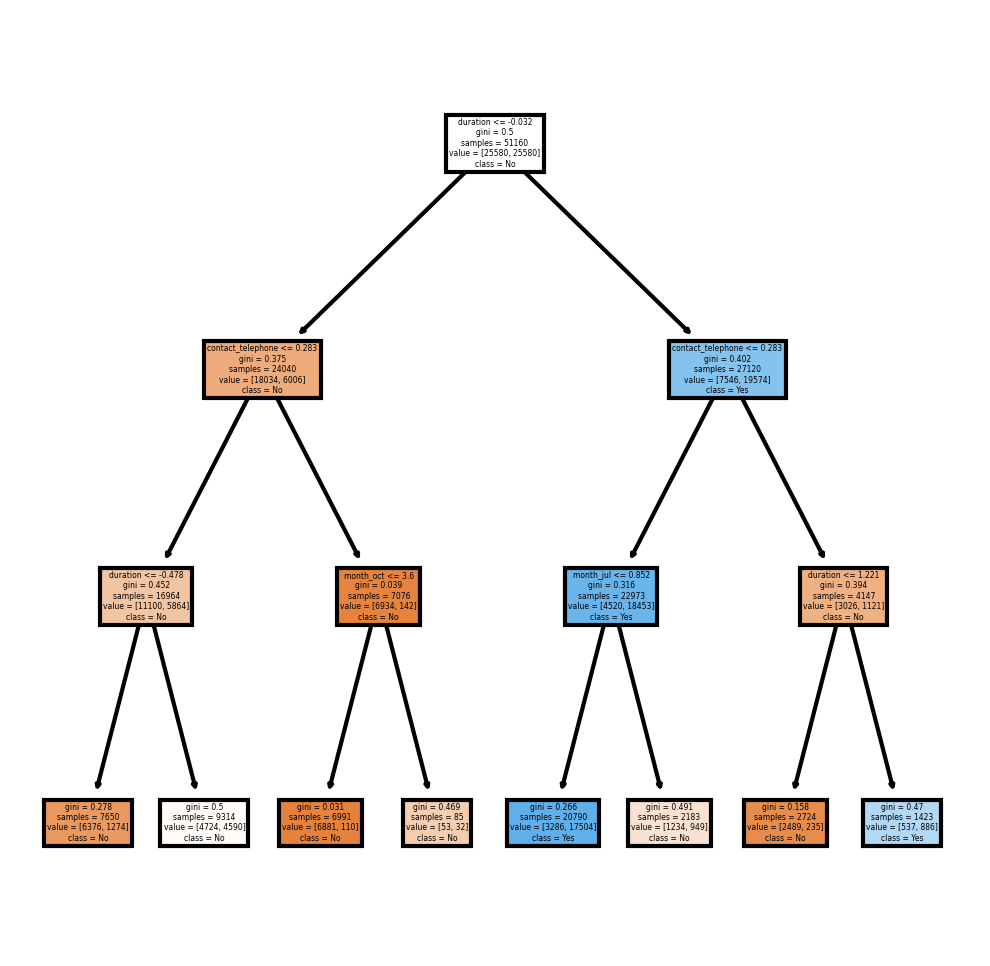

In [51]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [52]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

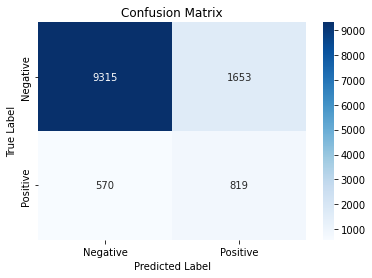

In [53]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [54]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7721129724043052


In [55]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

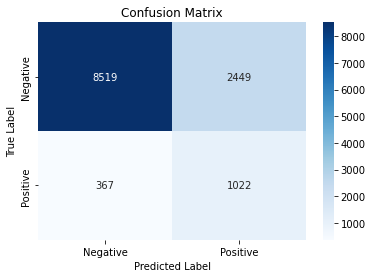

In [56]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [59]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

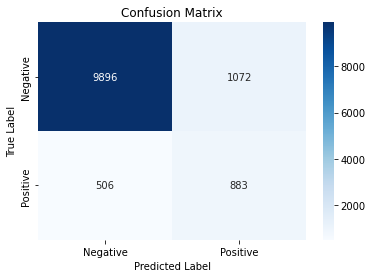

In [61]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [62]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

In [72]:
### SET YOUR BASE LEARNERS
base_learners = [ LogisticRegression(),
                 RandomForestClassifier(),
                 KNeighborsClassifier(n_neighbors=5),
                 KNeighborsClassifier(n_neighbors=15),
                 DecisionTreeClassifier(max_depth=5)]

super_learner = SuperLearner(folds=10, random_state=42)
super_learner.add(base_learners)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [75]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept=False).fit(base_predictions, y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))
y_true = y_test

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[-5.06735185, -1.43563227, -2.78708645, -1.89114267, 18.18042521]])

### The coefficients from the super learner shows that all other models perform poortly expect for the last model which is a decision tree classifier with the maximum depth size 5. The final prediction follows the prediction of the decision tree and ignores all the other models' predictions. 

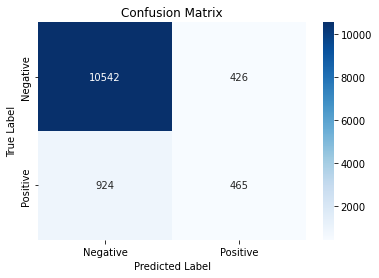

In [77]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
# save as confusion matrix super
cm_super = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and specificities (Out of Sample)

In [97]:
# calculate metrics
sen_raw = cm_raw[1,1] / (cm_raw[1,1] + cm_raw[1,0]) 
sen_bag = cm_bag[1,1] / (cm_bag[1,1] + cm_bag[1,0]) 
sen_boost = cm_boost[1,1] / (cm_boost[1,1] + cm_boost[1,0]) 
sen_super = cm_super[1,1] / (cm_super[1,1] + cm_super[1,0]) 

spec_raw = cm_raw[0,0] / (cm_raw[0,0] + cm_raw[0,1]) 
spec_bag = cm_bag[0,0] / (cm_bag[0,0] + cm_bag[0,1]) 
spec_boost = cm_boost[0,0] / (cm_boost[0,0] + cm_boost[0,1]) 
spec_super = cm_super[0,0] / (cm_super[0,0] + cm_super[0,1])

acc_raw = (cm_raw[0,0] + cm_raw[1,1]) / cm_raw.sum()
acc_bag = (cm_bag[0,0] + cm_bag[1,1]) / cm_bag.sum()
acc_boost = (cm_boost[0,0] + cm_boost[1,1]) / cm_boost.sum()
acc_super = (cm_super[0,0] + cm_super[1,1]) / cm_super.sum()


Text(0.5, 1.0, 'Accuracy')

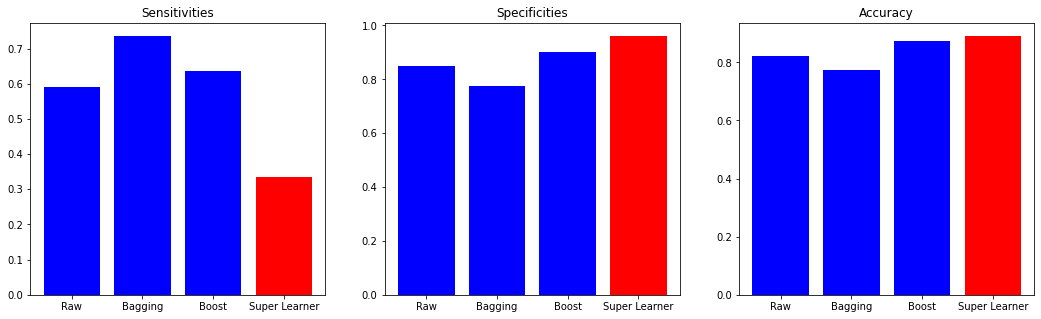

In [101]:
fig, ax = plt.subplots(1,3, figsize=(18,5))

x = np.array(['Raw', 'Bagging', 'Boost', 'Super Learner'])
y1 = np.array([sen_raw, sen_bag, sen_boost, sen_super])
y2 = np.array([spec_raw, spec_bag, spec_boost, spec_super])
y3 = np.array([acc_raw, acc_bag, acc_boost, acc_super])
c = ['blue', 'blue', 'blue', 'red']

ax[0].bar(x,y1, color=c)
ax[1].bar(x,y2, color=c)
ax[2].bar(x,y3, color=c)

ax[0].set_title('Sensitivities')
ax[1].set_title('Specificities')
ax[2].set_title('Accuracy')

### The sensitivities and specificities show that the super learner performs quite poorly in terms of predicting "positive" but performs well in predicting "negative." The overall accuracy is the highest with the super learner.